In [1]:
import pandas as pd
from pathlib import Path

from opera_tropo import download

In [2]:
hres_sds = download.HRESDownloader()

# Check how many input HRES model exists in the specified s3 bucket

In [3]:
# Check the number of files in s3 bucket
# Make sure to login with credentials with aws-login as default bucket is not public
hres_dates = hres_sds.list_matching_keys(start_date='20140101', end_date='20250901')

In [4]:
hres_dates = pd.DataFrame(hres_dates, columns=['s3_key', 'url'])
hres_dates['dates'] = hres_dates['s3_key'].apply(lambda x: x.split('/')[0])
hres_dates['filename'] = hres_dates['s3_key'].apply(lambda x: x.split('/')[1])
hres_dates = hres_dates[['dates', 'filename', 's3_key', 'url']]
hres_dates

,dates,filename,s3_key,url
0,20150101,ECMWF_TROP_201501010000_201501010000_1.nc,20150101/ECMWF_TROP_201501010000_201501010000_...,s3://opera-ecmwf/20150101/ECMWF_TROP_201501010...
1,20150101,ECMWF_TROP_201501010600_201501010600_1.nc,20150101/ECMWF_TROP_201501010600_201501010600_...,s3://opera-ecmwf/20150101/ECMWF_TROP_201501010...
2,20150101,ECMWF_TROP_201501011200_201501011200_1.nc,20150101/ECMWF_TROP_201501011200_201501011200_...,s3://opera-ecmwf/20150101/ECMWF_TROP_201501011...
3,20150101,ECMWF_TROP_201501011800_201501011800_1.nc,20150101/ECMWF_TROP_201501011800_201501011800_...,s3://opera-ecmwf/20150101/ECMWF_TROP_201501011...
4,20150102,ECMWF_TROP_201501020000_201501020000_1.nc,20150102/ECMWF_TROP_201501020000_201501020000_...,s3://opera-ecmwf/20150102/ECMWF_TROP_201501020...
...,...,...,...,...
13292,20250622,ECMWF_TROP_202506220600_202506220600_1.nc,20250622/ECMWF_TROP_202506220600_202506220600_...,s3://opera-ecmwf/20250622/ECMWF_TROP_202506220...
13293,20250622,ECMWF_TROP_202506221200_202506221200_1.nc,20250622/ECMWF_TROP_202506221200_202506221200_...,s3://opera-ecmwf/20250622/ECMWF_TROP_202506221...
13294,20250622,ECMWF_TROP_202506221800_202506221800_1.nc,20250622/ECMWF_TROP_202506221800_202506221800_...,s3://opera-ecmwf/20250622/ECMWF_TROP_202506221...
13295,20250623,ECMWF_TROP_202506230000_202506230000_1.nc,20250623/ECMWF_TROP_202506230000_202506230000_...,s3://opera-ecmwf/20250623/ECMWF_TROP_202506230...


# Download one HRES netcdf file

In [5]:
date = '20240910'
hour = '06'
filename = download._get_s3_key(date, hour)[1]
out_dir = Path('download_test').absolute()
out_dir.mkdir(exist_ok=True)

hres_sds.download_hres(out_dir, date, hour)

# Read the downloaded file

In [8]:
import xarray as xr
# Read
print(f'Reading {filename}')
ds = xr.open_dataset(out_dir / filename,
                     chunks={})
ds

Reading ECMWF_TROP_202409100600_202409100600_1.nc


<xarray.Dataset> Size: 29GB
Dimensions:    (time: 1, level: 137, latitude: 2560, longitude: 5120)
Coordinates:
  * longitude  (longitude) float32 20kB 2.501e-07 0.07031 0.1406 ... 359.9 359.9
  * latitude   (latitude) float32 10kB 89.95 89.88 89.81 ... -89.88 -89.95
  * level      (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * time       (time) datetime64[ns] 8B 2024-09-10T06:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    t          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    lnsp       (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2025-05-21 02:32:18 GMT by grib_to_netcdf-2.31.0: grib_to_n...

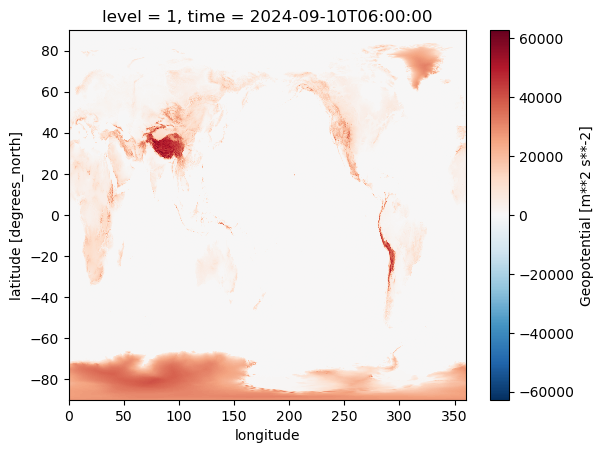

In [9]:
ds.z.isel(time=0, level=0).plot.imshow()